In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

__Example 2__ 

Newton's law of cooling is

## $$ \frac{dT}{dt} = -k(T - T_s(t))$$

where $T$ is the temperature of an object in the surroundings with temperature $T_s(t)$ (which may depend on time). Suppose $T$ represents the temperature of a shallow pool of water and $T_s(t)$ represents the temperature of outside. Find $T(t)$ given that you collected measurements of the outside:

In [24]:
t_m = np.array([ 0.        ,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])
temp_n = np.array([282.36932502, 285.80592146, 288.90249221, 291.78742922,
       293.64199874, 295.37952853, 298.12409895, 298.90842662,
       300.78073306, 300.94612788, 301.88222237, 302.94862289,
       302.38640232, 301.85616679, 302.32338555, 301.53991516,
       299.03845236, 297.28143179, 296.49174746, 293.46117109,
       291.88279964, 287.82484142, 285.79638862, 283.05060675])

Text(0, 0.5, 'Temperature [k]')

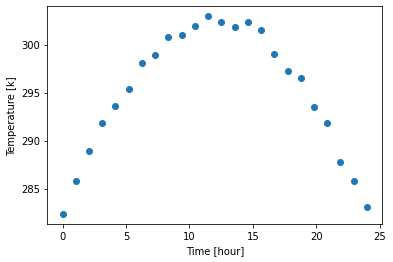

In [23]:
plt.scatter(t_m, temp_n)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [k]')

In [25]:
from scipy.interpolate import interp1d

In [37]:
ts = interp1d(t_m, temp_n, kind='cubic')

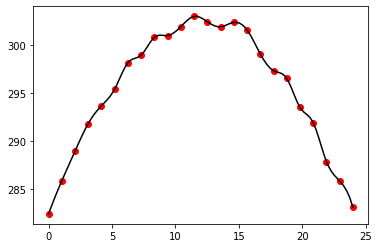

In [38]:
t = np.linspace(0, 24, 100)
plt.plot(t, ts(t), c='black')
plt.scatter(t_m, temp_n, c='red')

we assume $k = 0.5$ and $T_0 = 282.21345402$

In [42]:
def dtempdt(temp, t):
    return -0.5 * (temp - ts(t))
tl = np.linspace(1, 23, 100)
temp0 = 282.21345402

In [44]:
from scipy.integrate import odeint
temp = odeint(dtempdt, temp0, tl)

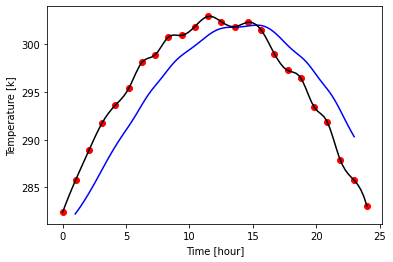

In [48]:
plt.plot(tl, temp, c='blue')
plt.plot(t, ts(t), c='black')
plt.scatter(t_m, temp_n, c='red')
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [k]')
plt.show()